<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

# Ames Iowa Housing Dataset

## Exploratory Data Analysis

In [113]:
import pandas as pd

In [114]:
# Load Ames Iowa Housing Dataset

iowa_df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')

In [115]:
iowa_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [116]:
pd.set_option('display.max_rows', 100)
iowa_df.dtypes[:5]

Id               int64
MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
dtype: object

In [117]:
iowa_df[['BedroomAbvGr', 'Fireplaces']].head(1)

,BedroomAbvGr,Fireplaces
0,3,0


In [118]:
iowa_df.BedroomAbvGr.head(10)

0    3
1    3
2    3
3    3
4    4
5    1
6    3
7    3
8    2
9    2
Name: BedroomAbvGr, dtype: int64

In [119]:
iowa_df['LotFrontage'].head(10)

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
5    85.0
6    75.0
7     NaN
8    51.0
9    50.0
Name: LotFrontage, dtype: float64

In [120]:
iowa_df['LotFrontage'].value_counts(dropna=False)

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 111, dtype: int64

In [121]:
import numpy as np

In [122]:
type(np.nan)

float

In [123]:
iowa_df['LotFrontage'].isnull().sum()

259

In [124]:
iowa_df['LotFrontage'].dropna(inplace=True)

In [125]:
# Why does this return 259 after running the "dropna" function?
# It should be 0

iowa_df['LotFrontage'].isnull().sum()

259

In [126]:
iowa_df['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

## Creating a new column

In [127]:
small_df = iowa_df[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'SalePrice']].copy()
small_df.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice
0,856,856,854,208500
1,1262,1262,0,181500
2,920,920,866,223500
3,756,961,756,140000
4,1145,1145,1053,250000


In [128]:
small_df['TotalSquareFootage'] = small_df['TotalBsmtSF'] + iowa_df['1stFlrSF'] + iowa_df['2ndFlrSF']
small_df.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSquareFootage
0,856,856,854,208500,2566
1,1262,1262,0,181500,2524
2,920,920,866,223500,2706
3,756,961,756,140000,2473
4,1145,1145,1053,250000,3343


In [129]:
small_df['PricePerSqFt'] = small_df['SalePrice'] / small_df['TotalSquareFootage']
small_df.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSquareFootage,PricePerSqFt
0,856,856,854,208500,2566,81.254871
1,1262,1262,0,181500,2524,71.909667
2,920,920,866,223500,2706,82.594235
3,756,961,756,140000,2473,56.611403
4,1145,1145,1053,250000,3343,74.783129


In [130]:
iowa_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [131]:
iowa_df['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [132]:
iowa_df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [133]:
pd.crosstab(iowa_df['Alley'], iowa_df['LotShape'])

LotShape,IR1,IR2,IR3,Reg
Alley,,,,
Grvl,4,0,1,45
Pave,7,2,0,32


In [134]:
pd.crosstab(iowa_df['Alley'], iowa_df['LotShape'], margins=True)

LotShape,IR1,IR2,IR3,Reg,All
Alley,,,,,
Grvl,4,0,1,45,50
Pave,7,2,0,32,41
All,11,2,1,77,91


In [135]:
pd.crosstab(iowa_df['Alley'], iowa_df['LotShape'], margins=True, normalize='index')

LotShape,IR1,IR2,IR3,Reg
Alley,,,,
Grvl,0.080000,0.000000,0.020000,0.900000
Pave,0.170732,0.048780,0.000000,0.780488
All,0.120879,0.021978,0.010989,0.846154


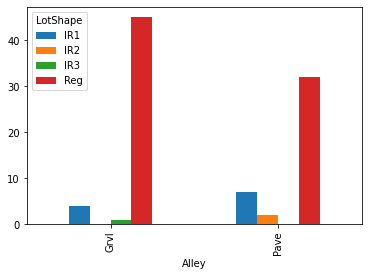

In [136]:
results = pd.crosstab(iowa_df['Alley'], iowa_df['LotShape'])
results.plot(kind='bar');

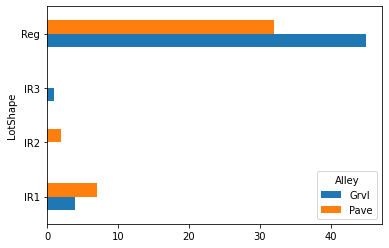

In [137]:
results = pd.crosstab(iowa_df['LotShape'], iowa_df['Alley'])
results.plot(kind='barh');

# LendingClub Dataset

## Load Data and Drop Null Values

In [138]:
! wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2021-01-02 21:55:06--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 54.201.80.203, 44.241.68.111, 54.202.200.60
Connecting to resources.lendingclub.com (resources.lendingclub.com)|54.201.80.203|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip.1’

LoanStats_2018Q4.cs     [              <=>   ]  22.39M  5.98MB/s    in 4.1s    

2021-01-02 21:55:10 (5.49 MB/s) - ‘LoanStats_2018Q4.csv.zip.1’ saved [23477897]



In [139]:
! unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
replace LoanStats_2018Q4.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [201]:
df = pd.read_csv('LoanStats_2018Q4.csv', header=1, skipfooter=2, engine='python')
df.shape

(128412, 144)

In [202]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,3300,3300,3300.0,36 months,23.40%,128.44,E,E1,Program Manager,3 years,RENT,49700.0,Source Verified,Dec-2018,Current,n,NaN,NaN,vacation,Vacation,310xx,GA,14.32,0,Nov-2006,1,43.0,NaN,6,0,2358,26.5%,46,w,1361.55,1361.55,3076.12,3076.12,...,50.0,0,0,170985,166884,2800,162085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,8500,8500,8500.0,36 months,16.14%,299.43,C,C4,Asst. Manager,8 years,MORTGAGE,80000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,home_improvement,Home improvement,756xx,TX,16.59,0,Mar-2006,1,48.0,NaN,11,0,683,8.2%,15,w,3296.63,3296.63,7174.89,7174.89,...,0.0,0,0,59470,41877,6200,30998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2200,2200,2200.0,36 months,15.02%,76.29,C,C3,NaN,NaN,RENT,70000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,871xx,NM,14.16,1,Feb-2006,0,7.0,NaN,7,0,1012,77.8%,12,w,0.00,0.00,2668.46,2668.46,...,100.0,0,0,228937,17314,1300,29137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,5000,5000,5000.0,36 months,17.97%,180.69,D,D1,Legal Assistant III,10+ years,MORTGAGE,53580.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,327xx,FL,21.16,0,Aug-1998,1,32.0,NaN,8,0,8018,35.2%,38,w,1970.46,1970.46,4329.07,4329.07,...,60.0,0,0,57426,41882,21500,34626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,17100,17100,17100.0,36 months,18.94%,626.30,D,D2,Receptionist,10+ years,RENT,38000.0,Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,150xx,PA,38.09,0,Mar-1998,1,47.0,NaN,14,0,15323,53%,21,w,6795.94,6795.94,15004.21,15004.21,...,75.0,0,0,70954,43351,16600,41784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [203]:
pd.set_option('display.max_rows', 200)
df.isnull().sum().sort_values(ascending=True)

inq_fi                                             0
mo_sin_old_rev_tl_op                               0
delinq_amnt                                        0
chargeoff_within_12_mths                           0
acc_open_past_24mths                               0
inq_last_12m                                       0
total_cu_tl                                        0
total_rev_hi_lim                                   0
open_rv_24m                                        0
open_rv_12m                                        0
total_bal_il                                       0
open_il_24m                                        0
open_il_12m                                        0
open_act_il                                        0
open_acc_6m                                        0
tot_cur_bal                                        0
tot_coll_amt                                       0
acc_now_delinq                                     0
application_type                              

In [204]:
df = df.drop(['url', 'member_id', 'desc', 'id'], axis=1)

## String Cleaning

In [205]:
df['int_rate'].head(10)

0     23.40%
1     16.14%
2     15.02%
3     17.97%
4     18.94%
5     16.14%
6     18.94%
7     16.91%
8     12.98%
9     11.80%
Name: int_rate, dtype: object

In [206]:
df['int_rate'][3]

' 17.97%'

In [207]:
type(df['int_rate'][3])

str

In [208]:
int_rate = ' 12.98%'

In [209]:
# Strip leading space

int_rate.strip()

'12.98%'

In [210]:
# Remove both

int_rate.strip().strip('%')

'12.98'

In [211]:
# Cast a string value to a float

float('12.98')

12.98

In [212]:
float(int_rate.strip().strip('%'))

12.98

In [213]:
type(float(int_rate.strip().strip('%')))

float

### String Cleaning Function

In [214]:
def myfunc(cell_contents):
  return float(cell_contents.strip().strip('%'))

In [215]:
myfunc(int_rate)

12.98

In [216]:
type(myfunc(int_rate))

float

In [217]:
# Apply the function to every cell in a column

new_list = []

In [218]:
#Fill list with desired values

for cell in df['int_rate']:
  new_list.append(myfunc(cell))

In [219]:
new_list[:10]

[23.4, 16.14, 15.02, 17.97, 18.94, 16.14, 18.94, 16.91, 12.98, 11.8]

In [220]:
# Convert list into a new column

df['int_rate_cleaned'] = pd.Series(new_list)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_cleaned
0,3300,3300,3300.0,36 months,23.40%,128.44,E,E1,Program Manager,3 years,RENT,49700.0,Source Verified,Dec-2018,Current,n,vacation,Vacation,310xx,GA,14.32,0,Nov-2006,1,43.0,NaN,6,0,2358,26.5%,46,w,1361.55,1361.55,3076.12,3076.12,1938.45,1137.67,0.0,0.0,...,0,0,170985,166884,2800,162085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,23.40
1,8500,8500,8500.0,36 months,16.14%,299.43,C,C4,Asst. Manager,8 years,MORTGAGE,80000.0,Not Verified,Dec-2018,Current,n,home_improvement,Home improvement,756xx,TX,16.59,0,Mar-2006,1,48.0,NaN,11,0,683,8.2%,15,w,3296.63,3296.63,7174.89,7174.89,5203.37,1971.52,0.0,0.0,...,0,0,59470,41877,6200,30998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14
2,2200,2200,2200.0,36 months,15.02%,76.29,C,C3,NaN,NaN,RENT,70000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,871xx,NM,14.16,1,Feb-2006,0,7.0,NaN,7,0,1012,77.8%,12,w,0.00,0.00,2668.46,2668.46,2200.00,468.46,0.0,0.0,...,0,0,228937,17314,1300,29137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,15.02
3,5000,5000,5000.0,36 months,17.97%,180.69,D,D1,Legal Assistant III,10+ years,MORTGAGE,53580.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,327xx,FL,21.16,0,Aug-1998,1,32.0,NaN,8,0,8018,35.2%,38,w,1970.46,1970.46,4329.07,4329.07,3029.54,1299.53,0.0,0.0,...,0,0,57426,41882,21500,34626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,17.97
4,17100,17100,17100.0,36 months,18.94%,626.30,D,D2,Receptionist,10+ years,RENT,38000.0,Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,150xx,PA,38.09,0,Mar-1998,1,47.0,NaN,14,0,15323,53%,21,w,6795.94,6795.94,15004.21,15004.21,10304.06,4700.15,0.0,0.0,...,0,0,70954,43351,16600,41784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,18.94


In [221]:
df.dtypes

loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
purpose                                        object
title                                          object
zip_code                    

### Utilizing the function we created with the .apply function

In [222]:
df['int_rate_cleaned2'] = df['int_rate'].apply(myfunc)
df['int_rate_cleaned2'].head()

0    23.40
1    16.14
2    15.02
3    17.97
4    18.94
Name: int_rate_cleaned2, dtype: float64

### Cleaning the 'emp_title' column

In [223]:
df['emp_title'].value_counts(dropna=False)[:20]

NaN                   20947
Teacher                2090
Manager                1773
Registered Nurse        952
Driver                  924
RN                      726
Supervisor              697
Sales                   580
Project Manager         526
General Manager         523
Office Manager          521
Owner                   420
Director                402
Operations Manager      387
Truck Driver            387
Nurse                   326
Engineer                325
Sales Manager           304
manager                 301
Supervisor              270
Name: emp_title, dtype: int64

In [224]:
# Number of different employment titles

len(df['emp_title'].unique())

43893

In [225]:
# Number of nulls in the column

df['emp_title'].isnull().sum()

20947

In [226]:
# Create some examples that represent the cases that we want to clean up

examples = ['owner', 'Supervisor', ' Project Manager', np.nan]

In [227]:
# Function to clean up and make this column uniform

def clean_title(job_title):
  if isinstance(job_title, str):
    return job_title.title().strip()
  else:
    return "Unknown"

In [228]:
empty_list = []

for title in examples:
  empty_list.append(clean_title(title))

In [229]:
empty_list

['Owner', 'Supervisor', 'Project Manager', 'Unknown']

In [230]:
# list comprehensions can combine function calls and for loops over lists
# into one succinct and fairly readable single line of code.

# This didn't work for me ****

[clean_title(title) for title in examples]

['Owner', 'Supervisor', 'Project Manager', 'Unknown']

In [231]:
df['emp_title'] = df['emp_title'].apply(clean_title)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_cleaned,int_rate_cleaned2
0,3300,3300,3300.0,36 months,23.40%,128.44,E,E1,Program Manager,3 years,RENT,49700.0,Source Verified,Dec-2018,Current,n,vacation,Vacation,310xx,GA,14.32,0,Nov-2006,1,43.0,NaN,6,0,2358,26.5%,46,w,1361.55,1361.55,3076.12,3076.12,1938.45,1137.67,0.0,0.0,...,0,170985,166884,2800,162085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,23.40,23.40
1,8500,8500,8500.0,36 months,16.14%,299.43,C,C4,Asst. Manager,8 years,MORTGAGE,80000.0,Not Verified,Dec-2018,Current,n,home_improvement,Home improvement,756xx,TX,16.59,0,Mar-2006,1,48.0,NaN,11,0,683,8.2%,15,w,3296.63,3296.63,7174.89,7174.89,5203.37,1971.52,0.0,0.0,...,0,59470,41877,6200,30998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14,16.14
2,2200,2200,2200.0,36 months,15.02%,76.29,C,C3,Unknown,NaN,RENT,70000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,871xx,NM,14.16,1,Feb-2006,0,7.0,NaN,7,0,1012,77.8%,12,w,0.00,0.00,2668.46,2668.46,2200.00,468.46,0.0,0.0,...,0,228937,17314,1300,29137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,15.02,15.02
3,5000,5000,5000.0,36 months,17.97%,180.69,D,D1,Legal Assistant Iii,10+ years,MORTGAGE,53580.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,327xx,FL,21.16,0,Aug-1998,1,32.0,NaN,8,0,8018,35.2%,38,w,1970.46,1970.46,4329.07,4329.07,3029.54,1299.53,0.0,0.0,...,0,57426,41882,21500,34626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,17.97,17.97
4,17100,17100,17100.0,36 months,18.94%,626.30,D,D2,Receptionist,10+ years,RENT,38000.0,Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,150xx,PA,38.09,0,Mar-1998,1,47.0,NaN,14,0,15323,53%,21,w,6795.94,6795.94,15004.21,15004.21,10304.06,4700.15,0.0,0.0,...,0,70954,43351,16600,41784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,18.94,18.94


In [232]:
df['emp_title'].value_counts(ascending=False)[:20]

Unknown               20947
Teacher                2557
Manager                2395
Registered Nurse       1418
Driver                 1258
Supervisor             1160
Truck Driver            920
Rn                      834
Office Manager          805
Sales                   803
General Manager         791
Project Manager         720
Owner                   625
Director                523
Operations Manager      518
Sales Manager           500
Police Officer          440
Nurse                   425
Technician              420
Engineer                412
Name: emp_title, dtype: int64

In [233]:
len(df['emp_title'].unique())

34902

In [234]:
df['emp_title'].isnull().sum()

0

## Working with Dates in Pandas

### Convert to pd datetime format

In [235]:
mylist = []

for col in df.columns:
  if col.endswith('_d'):
    mylist.append(col)

In [236]:
mycols = [col for col in df.columns if col.endswith('_d')]

In [237]:
df['issue_d'][:10]

0    Dec-2018
1    Dec-2018
2    Dec-2018
3    Dec-2018
4    Dec-2018
5    Dec-2018
6    Dec-2018
7    Dec-2018
8    Dec-2018
9    Dec-2018
Name: issue_d, dtype: object

In [238]:
# We can use pandas to infer a datetime format like the one here and translate it into a datetime object

df['issue_d'] = pd.to_datetime(df['issue_d'], infer_datetime_format=True)
df[mycols].head()

,issue_d,last_pymnt_d,next_pymnt_d,last_credit_pull_d
0,2018-12-01,Dec-2020,Jan-2021,Dec-2020
1,2018-12-01,Dec-2020,Jan-2021,Dec-2020
2,2018-12-01,Dec-2020,Dec-2020,Dec-2020
3,2018-12-01,Dec-2020,Jan-2021,Dec-2020
4,2018-12-01,Dec-2020,Jan-2021,Dec-2020


In [239]:
df['issue_d'].iloc[0]

Timestamp('2018-12-01 00:00:00')

In [240]:
df['issue_d'].head().values

array(['2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [241]:
lending_club = df

### Create new date columns

In [242]:
df=df[mycols].copy()
df['year'] = df['issue_d'].dt.year
df.head()

,issue_d,last_pymnt_d,next_pymnt_d,last_credit_pull_d,year
0,2018-12-01,Dec-2020,Jan-2021,Dec-2020,2018
1,2018-12-01,Dec-2020,Jan-2021,Dec-2020,2018
2,2018-12-01,Dec-2020,Dec-2020,Dec-2020,2018
3,2018-12-01,Dec-2020,Jan-2021,Dec-2020,2018
4,2018-12-01,Dec-2020,Jan-2021,Dec-2020,2018


In [243]:
df['month'] = df['issue_d'].dt.month
df.head()

,issue_d,last_pymnt_d,next_pymnt_d,last_credit_pull_d,year,month
0,2018-12-01,Dec-2020,Jan-2021,Dec-2020,2018,12
1,2018-12-01,Dec-2020,Jan-2021,Dec-2020,2018,12
2,2018-12-01,Dec-2020,Dec-2020,Dec-2020,2018,12
3,2018-12-01,Dec-2020,Jan-2021,Dec-2020,2018,12
4,2018-12-01,Dec-2020,Jan-2021,Dec-2020,2018,12


In [244]:
df.dtypes[-2:]

year     int64
month    int64
dtype: object

In [245]:
# Create a new column called days_from_earliest_credit_to_issue to indicate the length of a person's credit history

df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], infer_datetime_format=True)
df.head()

,issue_d,last_pymnt_d,next_pymnt_d,last_credit_pull_d,year,month
0,2018-12-01,Dec-2020,Jan-2021,2020-12-01,2018,12
1,2018-12-01,Dec-2020,Jan-2021,2020-12-01,2018,12
2,2018-12-01,Dec-2020,Dec-2020,2020-12-01,2018,12
3,2018-12-01,Dec-2020,Jan-2021,2020-12-01,2018,12
4,2018-12-01,Dec-2020,Jan-2021,2020-12-01,2018,12


In [246]:
df['last_credit_pull_d'] - df['issue_d']

0        731 days
1        731 days
2        731 days
3        731 days
4        731 days
           ...   
128407    31 days
128408   792 days
128409   792 days
128410   792 days
128411   792 days
Length: 128412, dtype: timedelta64[ns]

In [247]:
# Create new column

df['day_diff'] = (df['last_credit_pull_d'] - df['issue_d']).dt.days

df.head()

,issue_d,last_pymnt_d,next_pymnt_d,last_credit_pull_d,year,month,day_diff
0,2018-12-01,Dec-2020,Jan-2021,2020-12-01,2018,12,731.0
1,2018-12-01,Dec-2020,Jan-2021,2020-12-01,2018,12,731.0
2,2018-12-01,Dec-2020,Dec-2020,2020-12-01,2018,12,731.0
3,2018-12-01,Dec-2020,Jan-2021,2020-12-01,2018,12,731.0
4,2018-12-01,Dec-2020,Jan-2021,2020-12-01,2018,12,731.0


In [248]:
df['day_diff'].value_counts()

 792.0    31979
 731.0    31303
 761.0    29812
 670.0     3146
 517.0     2345
 701.0     2187
 578.0     1887
 639.0     1702
 365.0     1517
 609.0     1493
 396.0     1492
 700.0     1484
 762.0     1415
 548.0     1247
 304.0     1174
 335.0     1148
 456.0      999
 486.0      997
 457.0      946
 640.0      871
 212.0      805
 426.0      789
 273.0      730
 608.0      709
 243.0      563
 487.0      529
 151.0      515
 547.0      509
 334.0      409
 182.0      392
 0.0        388
 274.0      356
 242.0      329
 488.0      241
 92.0       230
 181.0      225
 395.0      191
 61.0       182
 427.0      180
 31.0       180
 121.0      159
 120.0      146
 123.0      127
 90.0       110
 62.0       107
 30.0        74
-30.0        62
-31.0        30
Name: day_diff, dtype: int64

# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

In [249]:
# revol_util has '%'

lending_club['revol_util_cleaned'] = lending_club['revol_util'].apply(myfunc)

AttributeError: ignored

In [ ]:
list(pd.loans)

You can uncomment and run the cells below to re-download and extract the Instacart data

In [ ]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [ ]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [ ]:
# %cd instacart_2017_05_01